<font color="darkblue"> Prática 01: Maquinas de Vetor de Suporte </font>

**Objetivos:**

*   Classificar dados aleatórios linearmente divisíveis com o SVM (*kernel* linear);
*   Classificar dados aleatórios não linearmente divisíveis usando $kernel=poly$ (polinômio de grau 2). 

**Atividade 1:**

1. Gerar 50 pontos aleatórios linearmente divisíveis com o método *make_blobs* do pacote *sklearn.datasets*;
2. Plotar os conjuntos com cores distintas.

    

/home/erlo/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


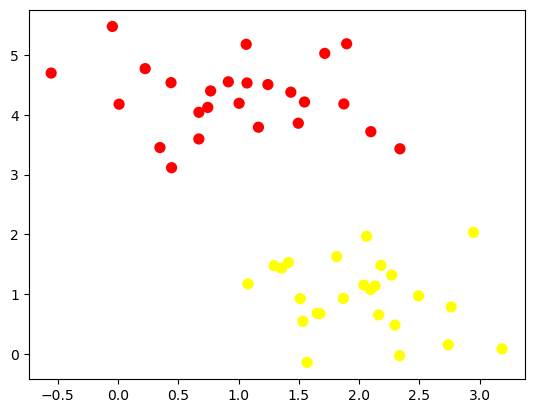

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [3]:
import pandas as pd
y_series = pd.Series(y)
y_series.value_counts()

1    25
0    25
Name: count, dtype: int64

**Atividade 2:**

1. Classificar os dados utilizando a classe *SVC* do pacote *sklearn.svm* e $kernel=linear$


In [ ]:
from sklearn.svm import SVC  

model = SVC(kernel='linear')
model.fit(X, y)

print("#VS: " + str(model.n_support_))
print(model.support_vectors_)



**Atividade 3:**

1.  Plotar a função de decisão construída pelo classificador SVC;
2.  Plotar os vetores de suporte identificados pelo classificador SVC.

In [ ]:
import numpy as np

def plot_svc_decision_function(model):
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    plt.contour(X, Y, P,  colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
   
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

# plot support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=10, linewidth=10, facecolors='k');

**Atividade 4:**
1.  Criar pontos aleatórios em forma de círculo (linearmente não divisíveis) utilizando a função *make_circles* do pacote *sklearn.datasets*;
2.  Plote os pontos em um grafo de dispersão.

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

**Atividade 5:**

1.  Classificar os dados aleatórios com o SVC de $kernel=linear$;
2.  Plotar a função de decisão construída pelo SVC;
3.  Plotar os vetores de suporte identificados pelo SVC;
4.  Analisar o resultado.

In [ ]:
clf = SVC(kernel='poly', degree=3).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)

# plot support vectors
plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=10, linewidth=10, facecolors='k');
print("#VS : " + str(len((clf.support_vectors_))))

**Atividade 6:**

1. Classificar dados aleatórios não linearmente divisíveis usando $kernel=poly$ e $degree=2$.

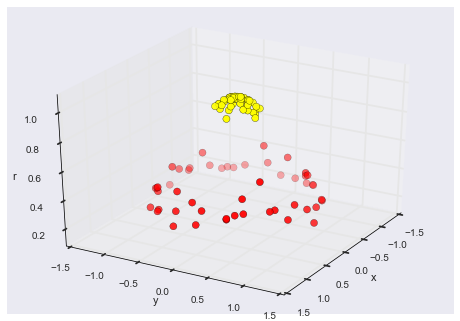

In [ ]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

**Atividade 7:**

1.  Plotar a função de decisão construída pelo SVC no espaço original $X$ dos dados;
2.  Plotar os vetores de suporte identificados pelo SVC no espaço original $X$ dos dados.

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)

# plot support vectors
plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=10, linewidth=10, facecolors='k');
print("#VS : " + str(len((clf.support_vectors_))))